# Regional 3D plot

Load a regional crop of the earth topography, texture and plot some temperature data

TODO: needs documentation / annotation

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import lavavu
import os
import accessvis

## Load some temperature data

In [2]:
#https://thredds.nci.org.au/thredds/catalog/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r10i1p1f1/day/hfls/gn/latest/catalog.html?dataset=fs38/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r10i1p1f1/day/hfls/gn/latest/
thredds_server = "https://thredds.nci.org.au/thredds/dodsC/fs38/publications/"
dl_server = "https://thredds.nci.org.au/thredds/fileServer/fs38/publications/"

#Surface temperature
ver = "CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/1pctCO2"  #historical/"
fpath = "/r1i1p1f1/Amon/tas/gn/latest/tas_Amon_ACCESS-CM2_1pctCO2_r1i1p1f1_gn_095001-109912.nc"
var = 'tas'
url = f"{thredds_server}{ver}{fpath}"

In [3]:
print(f'{url}.html')

https://thredds.nci.org.au/thredds/dodsC/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/1pctCO2/r1i1p1f1/Amon/tas/gn/latest/tas_Amon_ACCESS-CM2_1pctCO2_r1i1p1f1_gn_095001-109912.nc.html


In [4]:
ds = xr.open_dataset(url)

/home/okaluza/python-default/lib/python3.12/site-packages/xarray/coding/times.py:170: SerializationWarning: Ambiguous reference date string: 950-01-01. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0950-01-01). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/home/okaluza/python-default/lib/python3.12/site-packages/xarray/coding/times.py:987: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/okaluza/python-default/lib/python3.12/site-packages/xarray/core/indexing.py:525: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason

In [5]:
ds

<xarray.Dataset> Size: 199MB
Dimensions:    (time: 1800, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) object 14kB 0950-01-16 12:00:00 ... 1099-12-16 12:00:00
  * lat        (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 29kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    tas        (time, lat, lon) float32 199MB ...
Attributes: (12/48)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           0.0
    creation_date:                   2019-11-09T01:28:10Z
    ...                              ...
    variant_label:                   r1i1p1f1
    version:                         v20191109
    cmor_version:                    3.4.0
    tracking_id:                     hdl:21.14100/6b06c6c3-9fd2-4303-b07a-045...
    license:                         CMIP6 model data produced by CSIRO is li...
    DODS_EXTRA.Unlimited_Dimension:  time

In [6]:
times = ds['time']
data = ds[var]

In [7]:
data

<xarray.DataArray 'tas' (time: 1800, lat: 144, lon: 192)> Size: 199MB
[49766400 values with dtype=float32]
Coordinates:
  * time     (time) object 14kB 0950-01-16 12:00:00 ... 1099-12-16 12:00:00
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height   float64 8B ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-11-09T01:28:09Z altered by CMOR: Treated scalar dime...
    _ChunkSizes:    [  1 144 192]

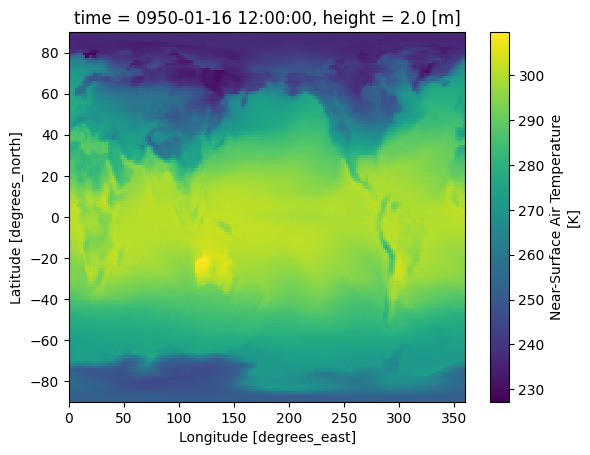

In [8]:
data[0].plot()

## Select a region to plot

In [9]:
#South-eastern Australia (lat,lon) (y,x)
TL = (-29, 135)
BR = (-45, 160)

## Crop the data to selected region

In [10]:
#Prepare cropped region
min_lat = BR[0]
max_lat = TL[0]
min_lon = TL[1]
max_lon = BR[1]

cropped_ds = ds.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon,max_lon))

In [11]:
cropped_ds

<xarray.Dataset> Size: 1MB
Dimensions:    (time: 1800, bnds: 2, lat: 13, lon: 13)
Coordinates:
  * time       (time) object 14kB 0950-01-16 12:00:00 ... 1099-12-16 12:00:00
  * lat        (lat) float64 104B -44.38 -43.12 -41.88 ... -31.88 -30.62 -29.38
  * lon        (lon) float64 104B 135.9 137.8 139.7 141.6 ... 154.7 156.6 158.4
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 29kB ...
    lat_bnds   (lat, bnds) float64 208B ...
    lon_bnds   (lon, bnds) float64 208B ...
    tas        (time, lat, lon) float32 1MB ...
Attributes: (12/48)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           0.0
    creation_date:                   2019-11-09T01:28:10Z
    ...                              ...
    variant_label:                   r1i1p1f1
    version:                         v20191109
    cmor_version:                    3.4.0
    tracking_id:                     hdl:21.14100/6b06c6c3-9fd2-4303-b07a-045...
    license:                         CMIP6 model data produced by CSIRO is li...
    DODS_EXTRA.Unlimited_Dimension:  time

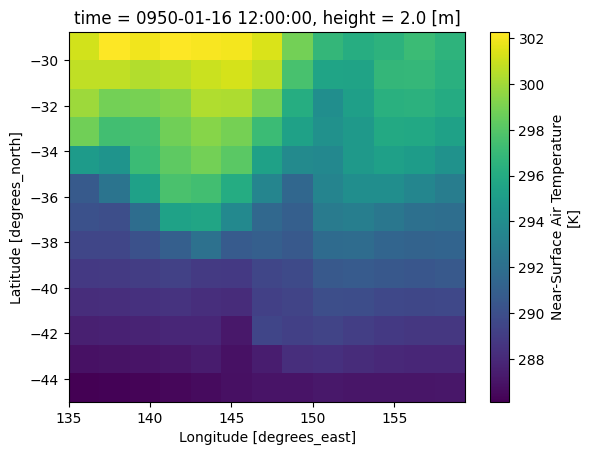

In [12]:
cropped_ds['tas'][0].plot()

In [13]:
cropped_ds.lat

<xarray.DataArray 'lat' (lat: 13)> Size: 104B
array([-44.375, -43.125, -41.875, -40.625, -39.375, -38.125, -36.875, -35.625,
       -34.375, -33.125, -31.875, -30.625, -29.375])
Coordinates:
  * lat      (lat) float64 104B -44.38 -43.12 -41.88 ... -31.88 -30.62 -29.38
    height   float64 8B ...
Attributes:
    bounds:         lat_bnds
    units:          degrees_north
    axis:           Y
    long_name:      Latitude
    standard_name:  latitude

In [14]:
cropped_ds.lon

<xarray.DataArray 'lon' (lon: 13)> Size: 104B
array([135.9375, 137.8125, 139.6875, 141.5625, 143.4375, 145.3125, 147.1875,
       149.0625, 150.9375, 152.8125, 154.6875, 156.5625, 158.4375])
Coordinates:
  * lon      (lon) float64 104B 135.9 137.8 139.7 141.6 ... 154.7 156.6 158.4
    height   float64 8B ...
Attributes:
    bounds:         lon_bnds
    units:          degrees_east
    axis:           X
    long_name:      Longitude
    standard_name:  longitude

In [15]:
latitude = cropped_ds.lat.values
longitude = cropped_ds.lon.values

## 3D Plot

In [16]:
#Use higher res topo when cropping to region
accessvis.resolution_selection(default=3)

Low-res 2K - fast for testing
Mid-res 4K - good enough for full earth views
High res 8K - better if showing close up at country scale
Ultra-high 16K - max detail but requires a fast GPU with high memory


Dropdown(description='Detail:', index=2, options=(('Low-res 2K', 1), ('Mid-res 4K', 2), ('High-res 8K', 3), ('…

In [17]:
#Pass the crop box to plot_region to get regional topography view
V_EXAG = 20.0 #Vertical exaggeration
cropbox=((latitude[0], longitude[0]), (latitude[-1], longitude[-1]))
lv = accessvis.plot_region(cropbox=cropbox, vertical_exaggeration=V_EXAG, bathymetry=False)

/home/okaluza/ACCESS-NRI/visualisations/src/accessvis/data
(14325, 16125) (37912, 40612)
(14325, 16125) (37912, 40612)


In [18]:
#Setup lighting
lv.set_properties(diffuse=0.6, ambient=0.85, specular=0.25, shininess=0.03, light=[1,1,0.98,1], lightpos=[0,0,10000,1])


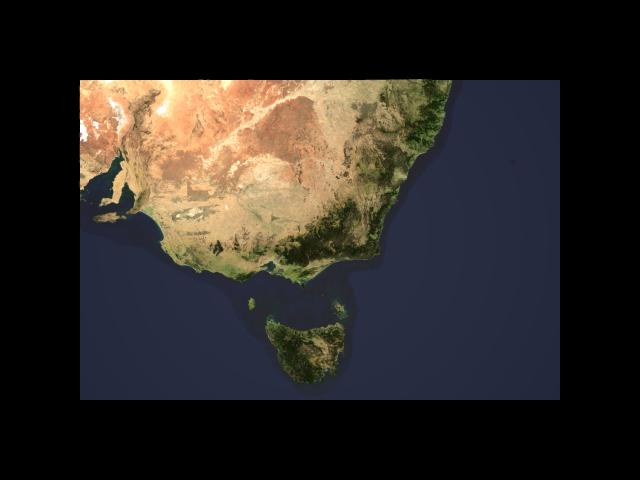

In [19]:
lv.display((640,480))

In [20]:
#Get first timestep temperature, converted to C
tas = np.array(cropped_ds[var][0])-273.15

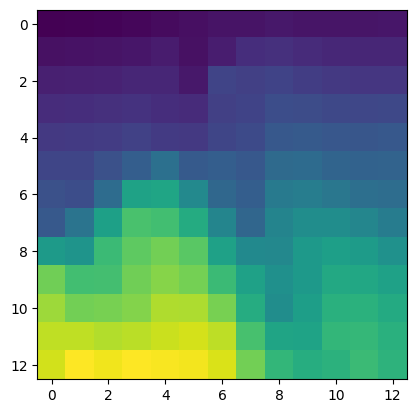

In [21]:
plt.imshow(tas)

In [22]:
#Apply a colourmap
rgba = accessvis.array_to_rgba(tas, colourmap='coolwarm')

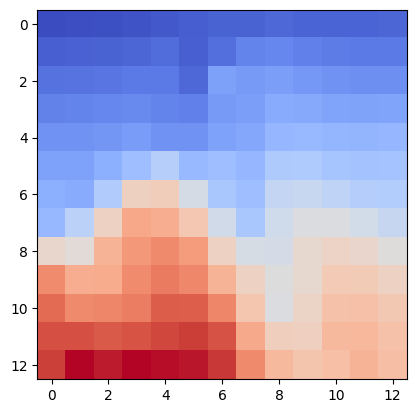

In [23]:
plt.imshow(rgba)

In [24]:
topo = lv.objects['surface']

In [25]:
#Grab the vertices from our existing topo surface
#We use vertices_copy() as we want to modify the data for a new surface,
#vertices() returns a reference to the actual data and without making a copy
#any changes would also modify the topo vertices in-place
V = topo.data.vertices_copy[0]

In [26]:
#Add a 5 metre offset for the overlay surface
offset = 5 * accessvis.MtoLL * V_EXAG
V[::,::,2] = V[::,::,2] + offset

In [27]:
#Create a new surface to plot temperature on
tsurf = lv.triangles('temperature', vertices=V, cullface=True, texture="blank.png", lit=False, alpha=0.6)

In [28]:
lv.reload()

In [29]:
#Load the colourmapped data
tsurf.texture(rgba)

In [30]:
cmap = lv.colourmap('coolwarm', range=(0,50))
cb = lv.colourbar()
#cb['range'] = (0,50)


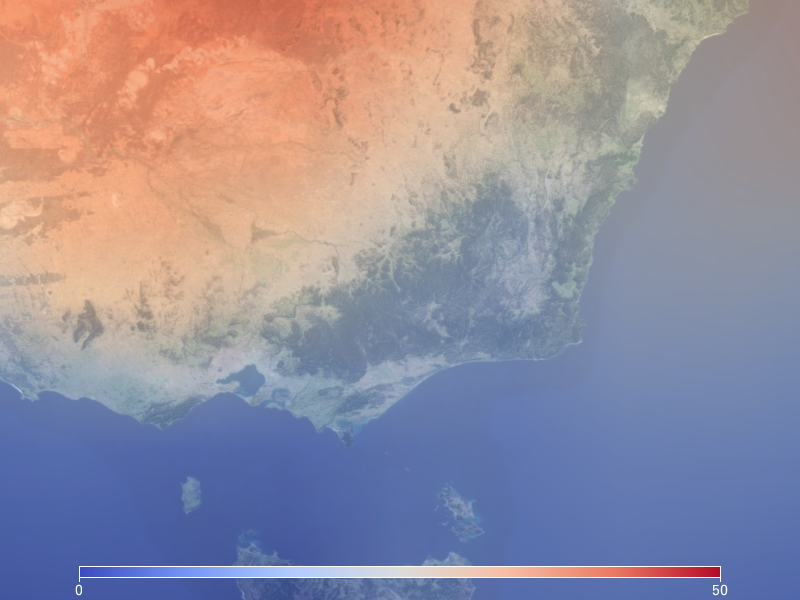

In [31]:
lv.reset()
lv.translation(0.0, 0.0, -11)
lv.display((800,600))

In [32]:
# Set a different camera view

In [33]:
lv.translation(0, 1.5, -11.5)
lv.rotation(-37, 0, 0)


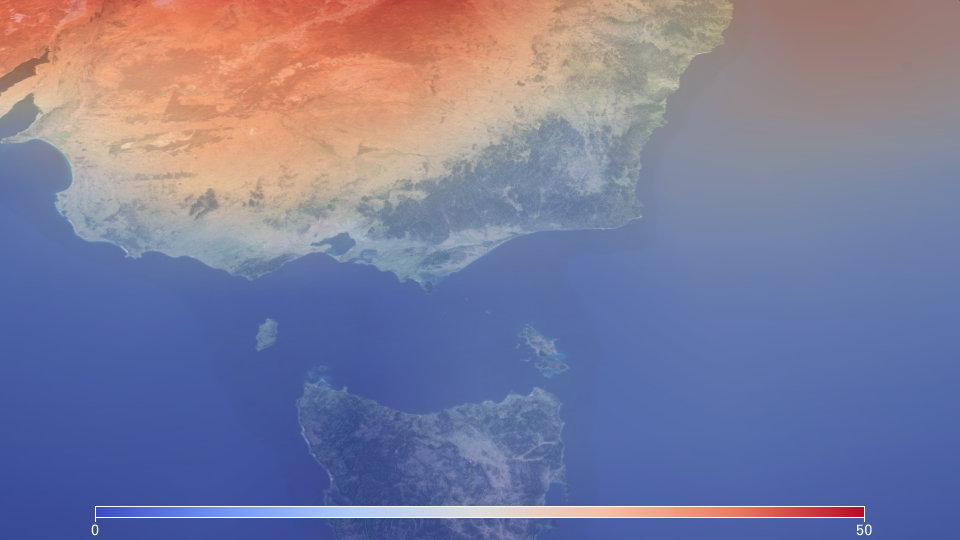

In [34]:
lv.display((1920//2,1080//2))

## Animation

Plot temperature data for January over full dataset

In [ ]:
from tqdm.notebook import tqdm
step = 12
fn = 'regional_temp_jan.mp4'
with lv.video(filename=fn, fps=60, quality=3, resolution=(1920//2,1080//2), params="autoplay"):    
    for ts in tqdm(range(0,len(times),step)):
        lv["title"] = f"+y{ts//12+1} m{ts%12+1}"
        tas = np.array(cropped_ds[var][ts])-273.15
        rgba = accessvis.array_to_rgba(tas, colourmap='coolwarm')
        tsurf.texture(rgba)
        lv.render()
    #Final frames
    for i in range(40):
        lv.render()